<a href="https://colab.research.google.com/github/hirankaushalya/DL-Lab5/blob/main/It21287022_q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
def generate_sine_wave(seq_length=100, num_samples=1000):
    x = np.linspace(0, 50, num_samples)
    y = np.sin(x)
    return y

In [3]:
def create_dataset(data, time_step=10):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

In [4]:
data = generate_sine_wave()
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1)).reshape(-1)

In [5]:
# Create the Dataset
time_step = 10  # Time steps for RNN input
X, y = create_dataset(data, time_step)

In [6]:
# Reshape for RNN input [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [7]:
# Split the Data into Training and Testing Sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [8]:
model = Sequential()
model.add(SimpleRNN(units=20, return_sequences=False, input_shape=(time_step, 1)))  # <-- Tune 'units'
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)  # <-- Experiment with 'epochs' and 'batch_size'

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5453
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0616
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0313
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0228
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0154
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0043
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0017
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.7380e-04
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.0323e-04
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.2733e-04
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.8077e-04
Epoch 13/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.9823e-04
Epoch 14/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.0406e-04
Epoch 15/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.

In [10]:
y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


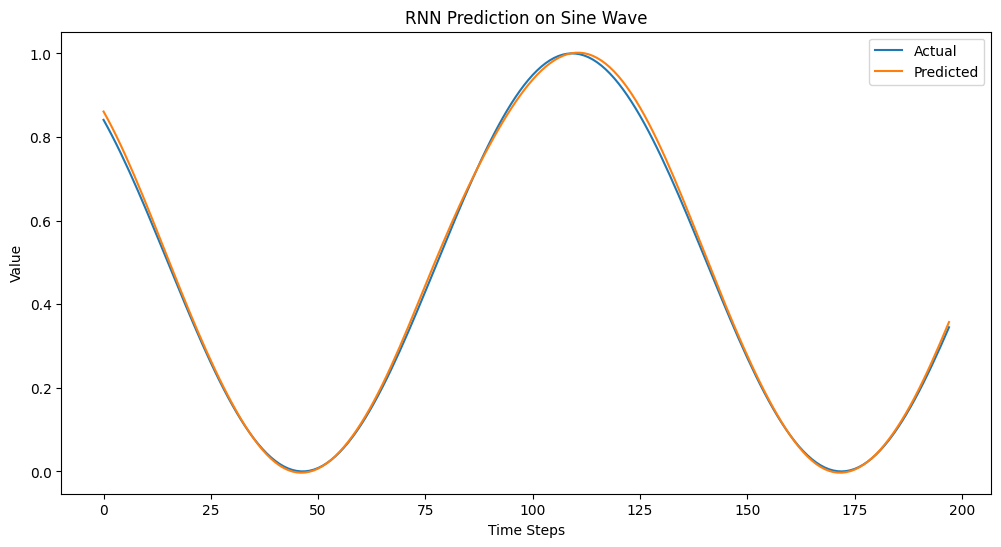

In [11]:
# 6. Plot the Results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('RNN Prediction on Sine Wave')
plt.legend()
plt.show()